# A recursively defined sequence

https://projecteuler.net/problem=197

Notes:
- I don't recognize this peculiar `30.403243784` float. After a quick browse it does not seem to be a well-known maths constant
- I quickly see that `2**30` is `(2**10)**3` which is ~ `1000**3` which is 1 billion. This gets divided by 10**9 giving a close to 1 number, coincidence?
- we are asked for u_n + u_(n+1) so I'm wondering if there's a trick such that this sum simplifies somehow. But looking at the definition of U_n it doesn't look like so
- the *n* value I'll need to use to compute U_n is large (`10**12`), that value is too high to iterate over. This tells me that I need to look for a shortcut
- why is U_0 equal to -1 when 1 instead would do the same and is more consistent with the subsequent values of the series?

In [43]:
import matplotlib.pyplot as plt
import sys; sys.setrecursionlimit(5_000) # to explore the series

In [3]:
def f(x:float) -> float: return int(2**(30.403243784-x**2)) / (10**9)

In [44]:
def u(n:int) -> float:  # throughout I found that no memoization was necessary
    return -1 if n == 0 else f(u(n-1))

In [33]:
print(*[f"u({i})={u(i)}" for i in range(20)], end="\n...", sep='\n')

u(0)=-1
u(1)=0.71
u(2)=1.001242148
u(3)=0.708777686
u(4)=1.002446415
u(5)=0.707593212
u(6)=1.0036128
u(7)=0.706446531
u(8)=1.0047414
u(9)=0.705337499
u(10)=1.005832407
u(11)=0.704265882
u(12)=1.006886102
u(13)=0.703231357
u(14)=1.007902851
u(15)=0.702233522
u(16)=1.008883094
u(17)=0.701271903
u(18)=1.009827343
u(19)=0.700345957
...

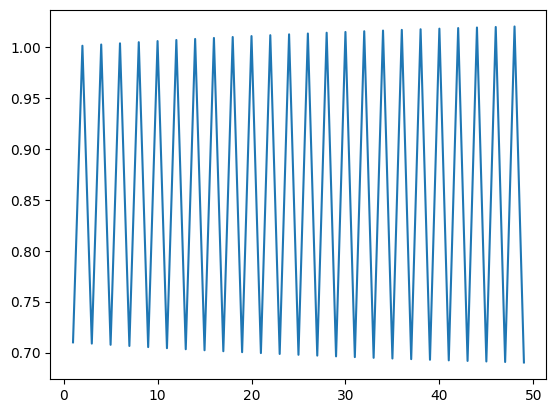

In [11]:
plt.plot(range(1,50), list(map(u, range(1,50))));

OK so we are dealing with an alternating series. I notice the upper terms, those close to 1 are increasing while the lower terms, those close to .7, as decreasing.
Further, the rate of expansion decreases, so there might a limit value which means it could be a good enough proxy of `U_10**12`

If I can predict the rate of expansion I might be able to compute `U_10**12`

## Let's examine the odd-n terms

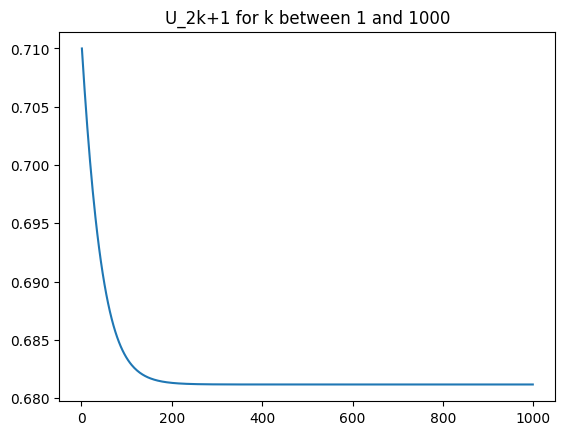

In [26]:
plt.plot(range(1,1000,2), list(map(u, range(1,1000,2))))
plt.title("U_2k+1 for k between 1 and 1000");

## Let's examine the even-n terms

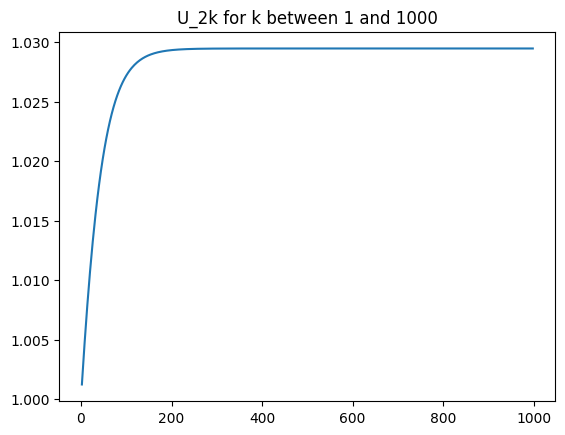

In [27]:
plt.plot(range(2,1000,2), list(map(u, range(2,1000,2))))
plt.title("U_2k for k between 1 and 1000");

I can see there is a clear inflexion point at around n = 150. If needed I could calculate it with the second derivative (although the flooring complicates matters).
It's possible that beyond that point, the values of **u(n)** no longer move in the first nine decimal digits, effectively producing a good enough proxy, as stated above

In [30]:
for n in (100,200,1000, 4900): print(u(n))

1.027182027
1.029324252
1.029461839
1.029461839


I'll iterate over respectively even and odd values of n, and look for the first index from which the delta between two consecutive values of U_n is less than the required precision

In [42]:
REQUIRED_PRECISION = 10**(-10)  # one digit further than the text's precision to allow for adding up a and b carry

k = 0
while abs(u(2*k+3)-u(2*k+1)) > REQUIRED_PRECISION:
    k += 1
    
a = u(2*k+3); print(a)

k = 0
while abs(u(2*k)-u(2*k+2)) > REQUIRED_PRECISION:
    k += 1
    
b = u(2*k+2); print(b)

print(f"Ans: {a+b}")

0.681175878
1.029461839
Ans: 1.710637717
